# Import and initial setup

In [72]:
# Import Necessary Libaraies
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

# Initial configuration
raw_data_path = './Data/apartments_for_rent_classified_100K.csv'
sns.set_style('darkgrid')

In [73]:
# Determine what encoding has been used
with open(raw_data_path, 'rb') as file:
    result = chardet.detect(file.read(100000))
    file_encoding = result['encoding']
file_encoding

'Windows-1252'

In [74]:
# Import Data
raw_data = pd.read_csv(raw_data_path, encoding=file_encoding, sep=';', low_memory=False)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [75]:
raw_data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


# Initial Data Cleaning

## Looking for missing values

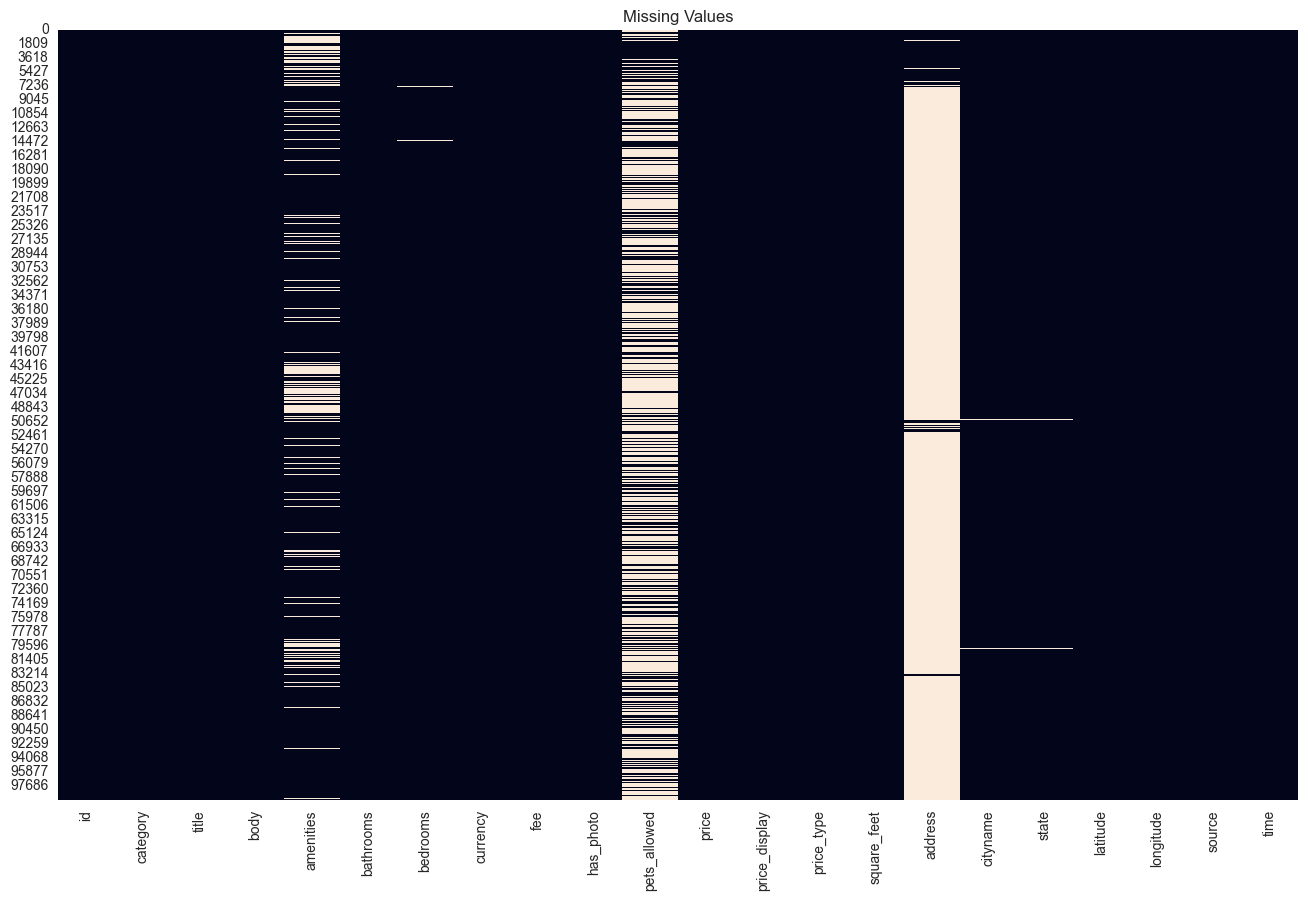

In [76]:
plt.figure(figsize=(16,10))
sns.heatmap(raw_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

Ved at se på grafen her over kan man konkludere at det ikke vil være gavnligt medtage kolonnen 'address' grundet den store mængde manglende data.
Der opstår her et problem i kolonnen 'pets_allowed' da Pandas biblioteket læser værdien 'None','null' og 'NaN' som manglede værdier. Efter at have ændret det i det originale dataset, så alle 'None' værdier bliver til 'No' kan jeg se at der stadig er 17.5% (i datasættet med 10k) der mangler værdien
Vurderer derfor også at det fiver mening at fjerne denne værdi.
Der er et ligende problem med kolonnen 'amenities', her vælger jeg at tolke null værdier som at der ingen amenities er.


In [77]:
print(f"Procentage of columns lacking the amenities value:  {(len(raw_data.loc[raw_data['amenities'].isnull()])/len(raw_data))*100}")
print(f"Procentage of columns lacking the pets_allowed value:  {(len(raw_data.loc[raw_data['pets_allowed'].isnull()])/len(raw_data))*100}")
print(f"Procentage of columns lacking the address value:  {(len(raw_data.loc[raw_data['address'].isnull()])/len(raw_data))*100}")

Procentage of columns lacking the amenities value:  16.125919671933424
Procentage of columns lacking the pets_allowed value:  60.73252120773529
Procentage of columns lacking the address value:  92.01644353314839


In [78]:
# Remove columns with alot of missing values
data = raw_data.drop(['pets_allowed','address'], axis=1, inplace=False)

## Looking for other unnessesary values

In [79]:
# Checking if all rows use usd
print(f"Amount of rows where currency is not usd: {len(raw_data.loc[raw_data['currency'] != 'USD'])}")
print(f"Amount of rowd where 'price_type' is not monthly: {len(raw_data.loc[raw_data['price_type'] != 'Monthly'])}")
print(f"Amount of rows where 'fee' is not 'No': {len(raw_data.loc[raw_data['fee'] != 'No'])}")
print(f"Amount of rows where 'category' is not 'housing/rent/apartment': {len(raw_data.loc[raw_data['category'] != 'housing/rent/apartment'])}")

Amount of rows where currency is not usd: 0
Amount of rowd where 'price_type' is not monthly: 4
Amount of rows where 'fee' is not 'No': 201
Amount of rows where 'category' is not 'housing/rent/apartment': 61


Fordi alle rækkerne benytter USD i 'currency' kolonnen, er den kolonne ikke nødvendig. kolonnen  'Price_Display' er heller ikke nødvendig da den blot formaterer prisen i forhold til 'currency' og prisen ligger for sig selv i kolonnen 'price'
'title' kolonnen er en ustruktureret beskrivelse af lejemålet, og jeg vurdere ikke denne som relevant for den vidre analyse. Det samme er gældende for 'source' kolonnen, 'time' kolonnen og 'body' kolonnen

In [80]:
data.drop(['price_display','currency', 'title', 'source', 'time', 'body'], axis=1, inplace=True)

### The Category value

In [81]:
data['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

Som vist højre oppe er der blot 61 rækker, hvor der er tale om en anden type end "housing/rent/apartment" De andre kategorier er:
- 'housing/rent/home'
- 'housing/rent/short_term'
- 'housing/rent'
- 'housing/rent/condo'
- 'housing/rent/other'
- 'housing/rent/commercial/retail'

For at forenkle dataen vurderer jeg, grundet den meget begrænset variation af data, kan jeg først fjerne rækker, hvor kategorien ikke er 'housing/rent/apartment' derefter fjerner jeg kolonnen 'category'
Det samme gør sig gældende for kolonnen 'price_type', her er der blot 4 rækker hvor værdien ikke er 'monthly'.

In [82]:
data.drop(data[data['category'] != 'housing/rent/apartment'].index, inplace=True)
data.drop(data[data['price_type'] != 'Monthly'].index, inplace=True)
data.drop(['category','price_type'], axis=1, inplace=True)
data


,id,amenities,bathrooms,bedrooms,fee,has_photo,price,square_feet,cityname,state,latitude,longitude
0,5668640009,NaN,1.0,1.0,No,Thumbnail,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,5668639818,NaN,1.5,3.0,No,Thumbnail,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,5668639686,NaN,2.0,3.0,No,Thumbnail,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,5668639659,NaN,1.0,2.0,No,Thumbnail,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,5668639374,NaN,1.0,1.0,No,Thumbnail,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,780.0,605,Houston,TX,29.6151,-95.1998
99488,5121219696,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,No,Yes,813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,5121219420,"Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,1325.0,650,San Diego,CA,32.7379,-117.0914
99490,5121218935,"Gym,Pool",1.0,1.0,No,Yes,931.0,701,Huntersville,NC,35.4158,-80.8451


### The Amenities Values

Først finder jeg alle typer af amenities der opstår i datasettet 

In [83]:
# Find individual amenities
amenlist = list(data['amenities'])
arr_amenities = []
# Replace null values
for i in amenlist:
    if type(i) == float:
        arr_amenities.append("No Ammenities")
    else:
        arr_amenities.extend(i.split(","))
amenlist = list(arr_amenities)
print(set(amenlist))

{'AC', 'View', 'Patio/Deck', 'Dishwasher', 'Cable or Satellite', 'Elevator', 'Alarm', 'TV', 'Fireplace', 'Hot Tub', 'Refrigerator', 'Luxury', 'Parking', 'Garbage Disposal', 'Storage', 'Golf', 'Gated', 'Internet Access', 'Pool', 'Tennis', 'No Ammenities', 'Wood Floors', 'Basketball', 'Doorman', 'Washer Dryer', 'Gym', 'Clubhouse', 'Playground'}


Her ændre jeg alle alle tomme værdier, som jeg tolker som om der ikke er nogen amenities, til teksten "No Amenities"

In [84]:
data.loc[data['amenities'].isnull(), 'amenities'] = "No Amenities"

In [85]:
data

,id,amenities,bathrooms,bedrooms,fee,has_photo,price,square_feet,cityname,state,latitude,longitude
0,5668640009,No Amenities,1.0,1.0,No,Thumbnail,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,5668639818,No Amenities,1.5,3.0,No,Thumbnail,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,5668639686,No Amenities,2.0,3.0,No,Thumbnail,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,5668639659,No Amenities,1.0,2.0,No,Thumbnail,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,5668639374,No Amenities,1.0,1.0,No,Thumbnail,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,780.0,605,Houston,TX,29.6151,-95.1998
99488,5121219696,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,No,Yes,813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,5121219420,"Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,1325.0,650,San Diego,CA,32.7379,-117.0914
99490,5121218935,"Gym,Pool",1.0,1.0,No,Yes,931.0,701,Huntersville,NC,35.4158,-80.8451


Jeg opretter en colonne for hver type af amenity, og udfylder med 0 til start

In [86]:
# Adding columns to data
for i in set(amenlist):
    data.insert(2,i,0)

In [87]:
data

,id,amenities,Playground,Clubhouse,Gym,Washer Dryer,Doorman,Basketball,Wood Floors,No Ammenities,...,bathrooms,bedrooms,fee,has_photo,price,square_feet,cityname,state,latitude,longitude
0,5668640009,No Amenities,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Thumbnail,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,5668639818,No Amenities,0,0,0,0,0,0,0,0,...,1.5,3.0,No,Thumbnail,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,5668639686,No Amenities,0,0,0,0,0,0,0,0,...,2.0,3.0,No,Thumbnail,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,5668639659,No Amenities,0,0,0,0,0,0,0,0,...,1.0,2.0,No,Thumbnail,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,5668639374,No Amenities,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Thumbnail,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",0,0,0,0,0,0,0,0,...,1.0,1.0,No,Yes,780.0,605,Houston,TX,29.6151,-95.1998
99488,5121219696,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",0,0,0,0,0,0,0,0,...,2.0,2.0,No,Yes,813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,5121219420,"Garbage Disposal,Refrigerator",0,0,0,0,0,0,0,0,...,1.0,1.0,No,Yes,1325.0,650,San Diego,CA,32.7379,-117.0914
99490,5121218935,"Gym,Pool",0,0,0,0,0,0,0,0,...,1.0,1.0,No,Yes,931.0,701,Huntersville,NC,35.4158,-80.8451


Efter benytter jeg en lambda funktion der deler teksten i 'amenities' op i de enekte elementerm, og opdaterer den korrekte kolonne

In [88]:
for i in set(amenlist):
     data[i] = data['amenities'].apply(lambda x: 1 if i in x.split(',') else 0)
data.columns

Index(['id', 'amenities', 'Playground', 'Clubhouse', 'Gym', 'Washer Dryer',
       'Doorman', 'Basketball', 'Wood Floors', 'No Ammenities', 'Tennis',
       'Pool', 'Internet Access', 'Gated', 'Golf', 'Storage',
       'Garbage Disposal', 'Parking', 'Luxury', 'Refrigerator', 'Hot Tub',
       'Fireplace', 'TV', 'Alarm', 'Elevator', 'Cable or Satellite',
       'Dishwasher', 'Patio/Deck', 'View', 'AC', 'bathrooms', 'bedrooms',
       'fee', 'has_photo', 'price', 'square_feet', 'cityname', 'state',
       'latitude', 'longitude'],
      dtype='object')

Nu kan kolonnen amenities fjernes

In [89]:
data.drop(['amenities', 'No Ammenities'], axis=1, inplace=True)

In [90]:
data

,id,Playground,Clubhouse,Gym,Washer Dryer,Doorman,Basketball,Wood Floors,Tennis,Pool,...,bathrooms,bedrooms,fee,has_photo,price,square_feet,cityname,state,latitude,longitude
0,5668640009,0,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Thumbnail,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,5668639818,0,0,0,0,0,0,0,0,0,...,1.5,3.0,No,Thumbnail,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,5668639686,0,0,0,0,0,0,0,0,0,...,2.0,3.0,No,Thumbnail,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,5668639659,0,0,0,0,0,0,0,0,0,...,1.0,2.0,No,Thumbnail,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,5668639374,0,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Thumbnail,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,1,0,1,0,0,0,1,0,0,...,1.0,1.0,No,Yes,780.0,605,Houston,TX,29.6151,-95.1998
99488,5121219696,1,1,1,1,0,0,0,0,1,...,2.0,2.0,No,Yes,813.0,921,Jacksonville,FL,30.2254,-81.7579
99489,5121219420,0,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Yes,1325.0,650,San Diego,CA,32.7379,-117.0914
99490,5121218935,0,0,1,0,0,0,0,0,1,...,1.0,1.0,No,Yes,931.0,701,Huntersville,NC,35.4158,-80.8451


# Outlier Detection

# EDA
EDA Goals:
- Understand Price Distribution:
	- Analyze rental prices to see the typical range and identify high-end vs. affordable listings.
- Explore Size and Price Relationship:
	- Examine how square footage relates to price, which helps understand price per square foot.
- Location Analysis:
	- Check price trends by location or city to identify areas with higher rental costs.
- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

In [91]:
data.head(20)

,id,Playground,Clubhouse,Gym,Washer Dryer,Doorman,Basketball,Wood Floors,Tennis,Pool,...,bathrooms,bedrooms,fee,has_photo,price,square_feet,cityname,state,latitude,longitude
0,5668640009,0,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Thumbnail,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,5668639818,0,0,0,0,0,0,0,0,0,...,1.5,3.0,No,Thumbnail,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,5668639686,0,0,0,0,0,0,0,0,0,...,2.0,3.0,No,Thumbnail,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,5668639659,0,0,0,0,0,0,0,0,0,...,1.0,2.0,No,Thumbnail,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,5668639374,0,0,0,0,0,0,0,0,0,...,1.0,1.0,No,Thumbnail,975.0,624,Albuquerque,NM,35.1038,-106.6110
5,5668639368,0,0,0,0,0,0,0,0,0,...,1.5,2.0,No,Thumbnail,1250.0,965,Albuquerque,NM,35.1038,-106.6110
6,5668638765,0,0,0,0,0,0,0,0,0,...,2.0,2.0,No,Thumbnail,1600.0,1120,Hampton,VA,37.0451,-76.3664
7,5668638578,0,0,0,0,0,0,0,0,0,...,2.0,2.0,No,Thumbnail,1300.0,947,Lakewood,CO,39.6894,-105.1119
8,5668638476,0,0,0,0,0,0,0,0,0,...,1.0,2.0,No,Thumbnail,795.0,600,Charleston,WV,38.3454,-81.6219
9,5668638122,0,0,0,0,0,0,0,0,0,...,2.0,2.0,No,Thumbnail,2150.0,1005,Chatsworth,CA,34.2551,-118.5976


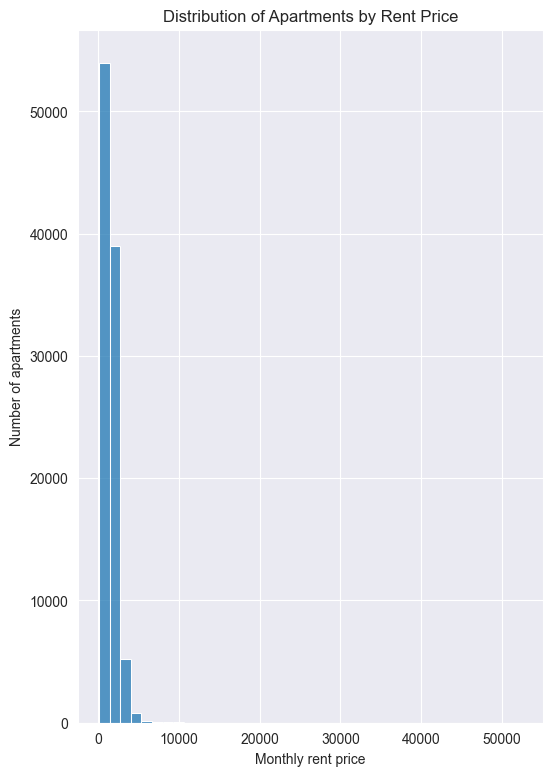

In [92]:
plt.figure(figsize=(6,9))
sns.histplot(data=data, x='price', bins=40, kde=False)
plt.xlabel("Monthly rent price")
plt.ylabel("Number of apartments")
plt.title("Distribution of Apartments by Rent Price")
plt.show()